# API 3 classification¶

## Algorithme : KNN
### API qui permettra la classification des patients / population diabétique (TG (Moyenne glycémique/ patient), type du diabète, activité physique, température)

In [49]:
# Ici chargez les bibliothéques python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Ici mettez la ou les commandes magiques jupyternote book
%matplotlib inline

In [75]:
import MySQLdb
import pandas.io.sql as psql

In [76]:
# setup the database connection.  There's no need to setup cursors with pandas psql.
db=MySQLdb.connect(host="localhost", user="root", passwd="root", db="medisys")

In [77]:
# create the query
query = "select * from pima"

In [78]:
# execute the query and assign it to a pandas dataframe
dataset = psql.read_sql(query, con=db)
# close the database connection
db.close()

In [79]:
dataset

,Unnamed_0,npreg,glu,bp,skin,bmi,ped,age,type,statut
0,1,6,148,72,35,33.6,0.627,50,Yes,Hyperglycémie
1,2,1,85,66,29,26.6,0.351,31,No,Normal
2,3,1,89,66,23,28.1,0.167,21,No,Normal
3,4,3,78,50,32,31.0,0.248,26,Yes,Normal
4,5,2,197,70,45,30.5,0.158,53,Yes,Hyperglycémie
5,6,5,166,72,19,25.8,0.587,51,Yes,Hyperglycémie
6,7,0,118,84,47,45.8,0.551,31,Yes,Hyperglycémie
7,8,1,103,30,38,43.3,0.183,33,No,Normal
8,9,3,126,88,41,39.3,0.704,27,No,Hyperglycémie
9,10,9,119,80,35,29.0,0.263,29,Yes,Hyperglycémie


In [71]:
#len(dataset)

332

In [66]:
# Rename header
#### header_names=['id','date','heure','tauxgly','mie','levelindex']
### df = pd.read_csv("tauxglucose.csv",sep=';',encoding='latin-1',skiprows=1,names=header_names)

In [80]:
 dataset.describe()

,Unnamed_0,npreg,glu,bp,skin,bmi,ped,age
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,166.500000,3.484940,119.259036,71.653614,29.162651,33.239759,0.528389,31.316265
std,95.984374,3.283634,30.501138,12.799307,9.748068,7.282901,0.363278,10.636225
min,1.000000,0.000000,65.000000,24.000000,7.000000,19.400000,0.085000,21.000000
25%,83.750000,1.000000,96.000000,64.000000,22.000000,28.175000,0.266000,23.000000
50%,166.500000,2.000000,112.000000,72.000000,29.000000,32.900000,0.440000,27.000000
75%,249.250000,5.000000,136.250000,80.000000,36.000000,37.200000,0.679250,37.000000
max,332.000000,17.000000,197.000000,110.000000,63.000000,67.100000,2.420000,81.000000


In [8]:
dataset.dtypes

Unnamed: 0      int64
npreg           int64
glu             int64
bp              int64
skin            int64
bmi           float64
ped           float64
age             int64
type           object
dtype: object

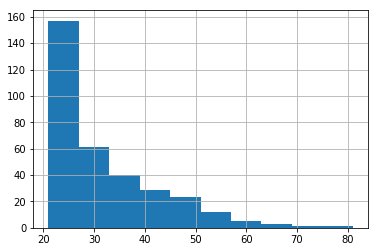

In [68]:
dataset["age"].hist()

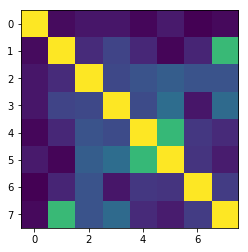

In [69]:
plt.imshow(dataset.corr());

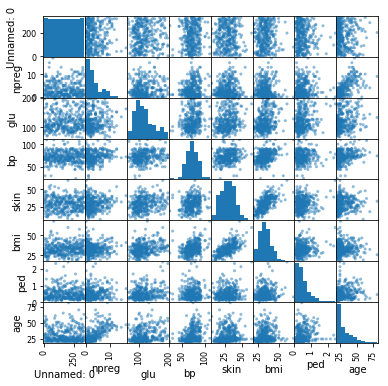

In [20]:
pd.plotting.scatter_matrix(dataset,figsize=(6,6));

In [54]:
## ajouter champ satut en fonction de nombre de glécimie
for ind,row in dataset.iterrows():
    if row['glu']>=110:
        dataset.loc[ind,'statut']="Hyperglycémie"
    elif row['glu']>=75 and row['glu']<110:
         dataset.loc[ind,'statut']="Normal"
    else:
        dataset.loc[ind,'statut']="Hypoglécimie"

        
               
    
 

In [55]:
dataset

,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age,type,statut
0,1,6,148,72,35,33.6,0.627,50,Yes,Hyperglycémie
1,2,1,85,66,29,26.6,0.351,31,No,Normal
2,3,1,89,66,23,28.1,0.167,21,No,Normal
3,4,3,78,50,32,31.0,0.248,26,Yes,Normal
4,5,2,197,70,45,30.5,0.158,53,Yes,Hyperglycémie
5,6,5,166,72,19,25.8,0.587,51,Yes,Hyperglycémie
6,7,0,118,84,47,45.8,0.551,31,Yes,Hyperglycémie
7,8,1,103,30,38,43.3,0.183,33,No,Normal
8,9,3,126,88,41,39.3,0.704,27,No,Hyperglycémie
9,10,9,119,80,35,29.0,0.263,29,Yes,Hyperglycémie


In [33]:
## Pourcentage des patients atteignent de l'hyperglécemie
pourcentageHyp=float((dataset ["statut"]=="Hyperglycémie").sum())/dataset.shape[0]
pourcentageHyp

0.5271084337349398

In [34]:
## Pourcentage des patients atteignent de l'hyperglécemie
pourcentageHyp=float((dataset ["statut"]=="Hyperglycémie").sum())/dataset.shape[0]
## Pourcentage des patients atteignent de l'hypoglécimie
percentHypo=float((dataset ["statut"]=="Hypoglécimie").sum())/dataset.shape[0]
## Pourcentage des patients atteignent de Normal
percentNormal=float((dataset ["statut"]=="Normal").sum())/dataset.shape[0]

## Classement des ages

In [ ]:
## Pourcentage des patients Enfants (00 à 14 ans)
enfant=float((dataset['age']<=14).sum())/dataset.shape[0]
#Age
## Pourcentage des patients Adolescents (15 à 24 ans)
Adol=float(((dataset['age']>=15)&(dataset['age']<=24)).sum())/dataset.shape[0]
## Pourcentage des patients Adultes (25 à 64 ans)
Adulte=float(((dataset['age']>=25)&(dataset['age']<64)).sum())/dataset.shape[0]
## Pourcentage des patients Aînés (64 ans et plus)
Aine=float((dataset['age']>64).sum())/dataset.shape[0]

In [9]:
## Nbr des patients Aînés (64 ans et plus)
## dataset [ dataset ["age"]>64 ].shape
## Pourcentage des patients Aînés (64 ans et plus)
float((dataset['age']>64).sum())/dataset.shape[0]

0.009036144578313253

In [10]:
## Pourcentage des patients Aînés (64 ans et plus)
float((dataset['age']>=64).sum())/dataset.shape[0]

0.009036144578313253

In [11]:
## Nbr des patients Enfants (00 à 14 ans)
float((dataset['age']<=14).sum())/dataset.shape[0]

0.0

In [52]:
## Nbr des patients Adolescents (15 à 24 ans)
float(((dataset['age']>=15)&(dataset['age']<=24)).sum())/dataset.shape[0]

0.3313253012048193

In [53]:
## Nbr des patients Adultes (25 à 64 ans)
float(((dataset['age']>=25)&(dataset['age']<64)).sum())/dataset.shape[0]

0.6596385542168675

## Classement des ages par Statut

 ### patients Aînés

In [13]:
## Pourcentage des Hyperglycémies 
float(((dataset['age']>=64)&(dataset["statut"]=="Hyperglycémie")).sum())/dataset.shape[0]   


0.006024096385542169

In [83]:
## Pourcentage des patients Hypoglycémies 
float(((dataset['age']>=64)&(dataset["statut"]=="Hypoglycémie")).sum())/dataset.shape[0]   

0.0

In [84]:
## Pourcentage des patients Normals
float(((dataset['age']>=64)&(dataset["statut"]=="Normal")).sum())/dataset.shape[0]   

0.0030120481927710845

 ### patients Adolescents

In [85]:
## Pourcentage des Hyperglycémies 
float(((dataset['age']>=15)&(dataset['age']<=24)&(dataset["statut"]=="Hyperglycémie")).sum())/dataset.shape[0]   

0.13855421686746988

In [14]:
## Pourcentage des patients Hypoglycémies 
float(((dataset['age']>=15)&(dataset['age']<=24)&(dataset["statut"]=="Hypoglycémie")).sum())/dataset.shape[0]  

0.0

In [81]:
# Classement des ages par Statut
 ### patients Enfants
 ## Pourcentage des Hyperglycémies 
hyperEnfant=float(((dataset['age']<=14)&(dataset["statut"]=="Hyperglycémie")).sum())/dataset.shape[0]  
## Pourcentage des patients Normals
NormalEnfant=float(((dataset['age']<=14)&(dataset["statut"]=="Normal")).sum())/dataset.shape[0]  
## Pourcentage des patients Hypoglycémies 
HypoEnfant=float(((dataset['age']<=14)&(dataset["statut"]=="Hypoglycémie")).sum())/dataset.shape[0] 
 ### patients Adultes
 ### patients Adolescents
 ## Pourcentage des Hyperglycémies 
hyperAdo=float(((dataset['age']>=15)&(dataset['age']<=24)&(dataset["statut"]=="Hyperglycémie")).sum())/dataset.shape[0]  
## Pourcentage des patients Normals
NormalAdo=float(((dataset['age']>=15)&(dataset['age']<=24)&(dataset["statut"]=="Normal")).sum())/dataset.shape[0]  
## Pourcentage des patients Hypoglycémies 
HypoAdo=float(((dataset['age']>=15)&(dataset['age']<=24)&(dataset["statut"]=="Hypoglycémie")).sum())/dataset.shape[0] 
 ### patients Adultes
## Pourcentage des Hyperglycémies 
hyperAdult=float(((dataset['age']>=25)&(dataset['age']<64)&(dataset["statut"]=="Hyperglycémie")).sum())/dataset.shape[0]
## Pourcentage des Hypoglycémies 
HypoAdult=float(((dataset['age']>=25)&(dataset['age']<64)&(dataset["statut"]=="Hypoglycémie")).sum())/dataset.shape[0]
## Pourcentage des Hypoglycémies 
NormalAdult=float(((dataset['age']>=25)&(dataset['age']<64)&(dataset["statut"]=="Normal")).sum())/dataset.shape[0] 
 ## patients Aînés
## Pourcentage des Hyperglycémies 
hyperAine=float(((dataset['age']>=64)&(dataset["statut"]=="Hyperglycémie")).sum())/dataset.shape[0] 
## Pourcentage des patients Hypoglycémies 
hypoAine=float(((dataset['age']>=64)&(dataset["statut"]=="Hypoglycémie")).sum())/dataset.shape[0]  

In [15]:
## Pourcentage des patients Normals
float(((dataset['age']>=15)&(dataset['age']<=24)&(dataset["statut"]=="Normal")).sum())/dataset.shape[0]  

0.18072289156626506

 ### patients Adultes

In [89]:
## Pourcentage des Hyperglycémies 
float(((dataset['age']>=25)&(dataset['age']<64)&(dataset["statut"]=="Hyperglycémie")).sum())/dataset.shape[0]

0.3825301204819277

In [72]:
## Pourcentage des Hypoglycémies 
float((((dataset['age']>=25)&(dataset['age']<64))&(dataset["statut"]=="Hypoglycémie")).sum())/dataset.shape[0]


0.0

In [19]:
## Pourcentage des Hypoglycémies 
float(((dataset['age']>=25)&(dataset['age']<64)&(dataset["statut"]=="Normal")).sum())/dataset.shape[0]

0.2620481927710843

## Passage de pandas vers numpy

In [82]:
X = dataset.iloc[:, [2,3,7]].values
y = dataset.iloc[:, 9].values

In [83]:
X

array([[148,  72,  50],
       [ 85,  66,  31],
       [ 89,  66,  21],
       [ 78,  50,  26],
       [197,  70,  53],
       [166,  72,  51],
       [118,  84,  31],
       [103,  30,  33],
       [126,  88,  27],
       [119,  80,  29],
       [ 97,  66,  22],
       [109,  75,  60],
       [ 88,  58,  22],
       [122,  78,  45],
       [103,  60,  33],
       [102,  76,  46],
       [ 90,  68,  27],
       [111,  72,  56],
       [180,  64,  26],
       [106,  92,  48],
       [171, 110,  54],
       [180,  66,  25],
       [ 71,  70,  22],
       [103,  80,  22],
       [101,  50,  26],
       [ 88,  66,  30],
       [150,  66,  42],
       [ 73,  50,  21],
       [105,  64,  22],
       [ 99,  74,  32],
       [109,  88,  38],
       [ 95,  66,  25],
       [146,  85,  27],
       [100,  66,  28],
       [129,  86,  23],
       [ 95,  72,  27],
       [112,  66,  24],
       [113,  44,  22],
       [ 83,  78,  36],
       [101,  65,  22],
       [106,  72,  45],
       [100,  68

## Splitting the dataset into the Training set and Test set

In [58]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


## Feature Scaling

In [59]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Mezni Mouafek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Mezni Mouafek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Mezni Mouafek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fitting KNN to the Training set

In [84]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [85]:
X_train

array([[-1.00347378e+00,  1.45735530e+00,  9.80320093e-01],
       [-2.57830970e-01,  4.24677290e-02, -5.97285241e-01],
       [-4.52346486e-01,  8.28516378e-01,  6.09118838e-01],
       [ 1.62248569e+00, -5.86371190e-01, -1.33283672e-01],
       [-7.76539013e-01, -1.21521011e+00,  7.01919152e-01],
       [-8.08958266e-01,  1.99677459e-01,  4.23518211e-01],
       [-3.08962006e-02, -1.68683930e+00,  1.45117269e-01],
       [-5.49604244e-01, -3.25893660e+00,  1.45117269e-01],
       [-6.33154533e-02,  9.85726108e-01, -4.04833584e-02],
       [-1.16557005e+00,  1.99677459e-01,  7.01919152e-01],
       [-4.52346486e-01, -5.86371190e-01,  2.37917583e-01],
       [-1.58702033e+00, -1.14742001e-01, -8.75686182e-01],
       [-1.19798930e+00, -5.07766325e-01, -6.90085555e-01],
       [ 1.07135839e+00,  8.28516378e-01, -7.82885869e-01],
       [ 1.97909747e+00, -5.86371190e-01,  6.09118838e-01],
       [ 1.94667822e+00, -4.29161460e-01, -5.97285241e-01],
       [-6.46862002e-01, -4.29161460e-01

In [86]:
y_pred = classifier.predict(X_test)

In [87]:
y_pred 

array(['Hyperglycémie', 'Normal', 'Hyperglycémie', 'Normal', 'Normal',
       'Normal', 'Normal', 'Hyperglycémie', 'Normal', 'Normal',
       'Hyperglycémie', 'Hyperglycémie', 'Normal', 'Normal',
       'Hyperglycémie', 'Normal', 'Hyperglycémie', 'Hyperglycémie',
       'Hyperglycémie', 'Hyperglycémie', 'Hyperglycémie', 'Normal',
       'Normal', 'Hyperglycémie', 'Hyperglycémie', 'Normal',
       'Hyperglycémie', 'Hyperglycémie', 'Hyperglycémie', 'Normal',
       'Normal', 'Normal', 'Hyperglycémie', 'Hyperglycémie'], dtype=object)

## Evaluation

In [65]:
y_test==y_pred

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True])

In [64]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0,  0,  1],
       [ 1,  0, 15]], dtype=int64)

In [66]:
from sklearn.metrics import classification_report

In [67]:
target_names = ['Hyper', 'Normal', 'Hypo']

In [68]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Hyper       0.94      1.00      0.97        17
      Normal       0.00      0.00      0.00         1
        Hypo       0.94      0.94      0.94        16

   micro avg       0.94      0.94      0.94        34
   macro avg       0.63      0.65      0.64        34
weighted avg       0.91      0.94      0.93        34



C:\Users\Mezni Mouafek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Data visualization

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


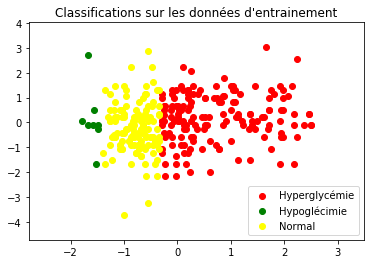

In [88]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','yellow','Blue'))(i), label = j)
    plt.title("Classifications sur les données d'entrainement")
    plt.legend();
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


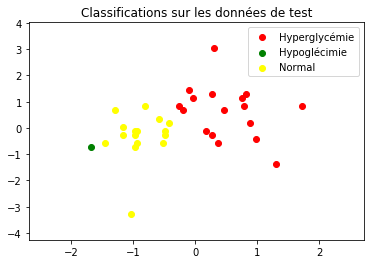

In [89]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','yellow','Blue'))(i), label = j)
    plt.title("Classifications sur les données de test")
    plt.legend();
    

In [73]:
dataset.to_csv("Pima.csv",index = False,encoding='utf-8')